# 프로젝트 : SRGAN 활용하기

## 프로젝트 1 : 직접고른 이미지로 SRGAN 실험하기

### 프로젝트 1-1 

#### 1.(적당히) 높은 해상도를 가진 이미지를 검색해서 한 장 고른 후 저장하고 불러옵니다.

(1542, 2056, 3)


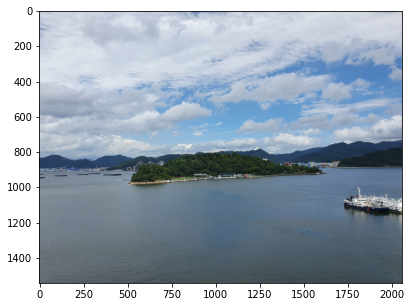

In [8]:
import os
import cv2
import matplotlib.pyplot as plt

sea_image_path = os.getenv('HOME') +'/aiffel/EXPLORATION_project/ex16/images/sea.jpg'
sea_image = cv2.imread(sea_image_path)
sea_image = cv2.cvtColor(sea_image, cv2.COLOR_BGR2RGB)

print(sea_image.shape)

plt.figure(figsize=(10,5))
plt.imshow(sea_image)

#### 2.불러온 이미지에 bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 1/4로 줄입니다. cv2.resize()를 사용해 봅시다.
- cv2.resize(원본이미지 경로받은 변수, 결과 이미지크기, 보간법)
- 결과 이미지 크기는 1/4 로 하고 (h3024 w1032 => 4분의 1=> fx=0.25, fy=0.25)
- 보간법은 bicubic => cv2.INTER_CUBIC


(385, 514, 3)


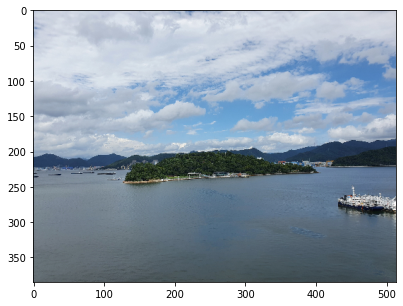

In [9]:
cubic_sea_image = cv2.resize(sea_image, dsize=(sea_image.shape[1]//4, sea_image.shape[0]//4), interpolation=cv2.INTER_CUBIC)

print(cubic_sea_image.shape)

plt.figure(figsize=(10,5))
plt.imshow(cubic_sea_image)

#### 3.줄인 저해상도 이미지를 입력으로 SRGAN을 이용해 고해상도 이미지를 생성합니다. 이전에 사용한 apply_srgan 함수를 사용하면 쉽습니다.

In [10]:
import tensorflow as tf
import os

model_file = os.getenv('HOME')+'/aiffel/EXPLORATION_project/srgan_G.h5'
srgan = tf.keras.models.load_model(model_file)

In [11]:
import numpy as np
def apply_srgan(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    sr = srgan.predict(image)
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]

In [12]:
srgan_hr = apply_srgan(cubic_sea_image)

- 원본이미지 크기가 가로 4000이 넘어가니 메모리가 부족하여 apply_srgan 으로 고해상도 이미지 생성이 계속 실패하였다.
- 이에 이미지 크기를 가로 2056으로 수정후 apply_srgan 함수가 작동하였다. 

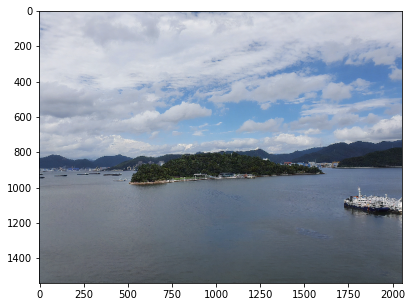

In [14]:
plt.figure(figsize=(10,5))
plt.imshow(srgan_hr)

#### 4.2.의 이미지에 bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 다시 4배로 늘립니다. 마찬가지로 cv2.resize()를 사용해 봅시다.

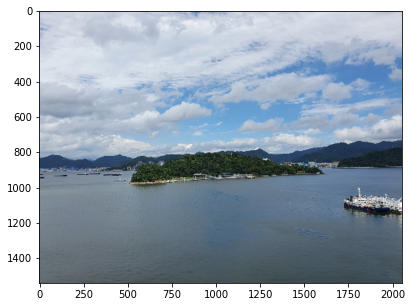

In [35]:
# bicubic interpolation으로 이미지 사이즈 키우기
bicubic_hr = cv2.resize(cubic_sea_image, dsize=(cubic_sea_image.shape[1]*4, cubic_sea_image.shape[0]*4),interpolation=cv2.INTER_CUBIC)

plt.figure(figsize=(10,5))
plt.imshow(bicubic_hr)

#### 5.3개 이미지(4.의 Bicubic의 결과, 3.의 SRGAN의 결과, 1.의 원래 고해상도 이미지)를 나란히 시각화합니다. 각 이미지의 제목에 어떤 방법에 대한 결과인지 표시해 주세요. 이전 시각화에 사용했던 코드를 참고하면 어렵지 않습니다.

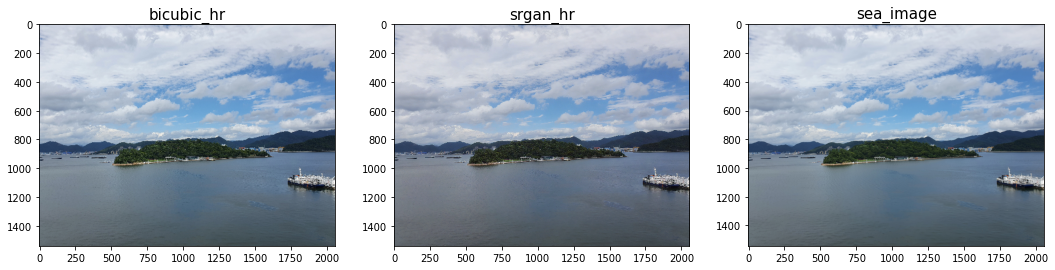

In [36]:
images = [bicubic_hr, srgan_hr, sea_image]
titles = ["bicubic_hr", "srgan_hr", "sea_image"]

plt.figure(figsize=(18,5))
for i, (image, title) in enumerate(zip(images, titles)):
    plt.subplot(1,3, i+1)
    plt.imshow(image)
    plt.title(title, fontsize=15)

Text(0.5, 1.0, 'sea_image')

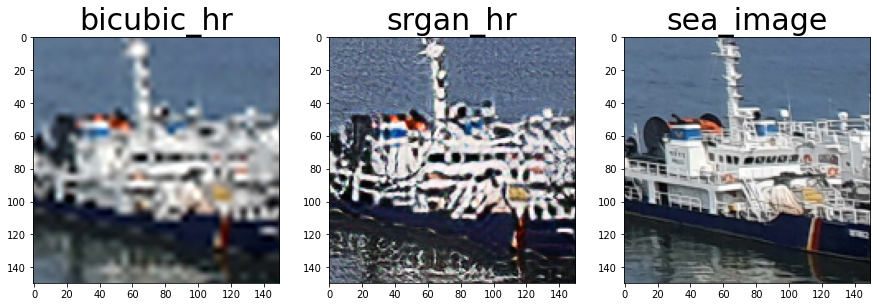

In [37]:
#이미지의 특정 부분을 잘라내는 함수정의
# top left에서 가로세로 150px 씩 잘라서 볼수있게
def crop(image, left_top, x=150, y=150):
    return image[left_top[0]:(left_top[0]+x), left_top[1]:(left_top[1]+y), :]

# 영역 잘라내어 보기
left_top = (1000,1750)

img1 = crop(bicubic_hr, left_top)
img2 = crop(srgan_hr , left_top)
img3 = crop(sea_image, left_top)

plt.figure(figsize=(15,25))
plt.subplot(1,3,1); plt.imshow(img1); plt.title("bicubic_hr", fontsize=30)
plt.subplot(1,3,2); plt.imshow(img2); plt.title("srgan_hr", fontsize=30)
plt.subplot(1,3,3); plt.imshow(img3); plt.title("sea_image", fontsize=30)

#### 6.선택한 이미지를 DIV2K 데이터셋에서 학습된 모델로 Super Resolution했을 때 어떠한 결과가 나왔으며, 왜 이러한 결과가 출력되었는지 설명해 봅시다. (정답은 없습니다)

- 컴퓨터가 예상하여 만들어낸 이미지이기 때문에 선명하나 형태가 완벽하게 보이지 않는다. 

### 프로젝트 1-2

#### 1.(적당히) 높은 해상도를 가진 이미지를 검색해서 한 장 고른 후 저장하고 불러옵니다.

(1542, 2056, 3)


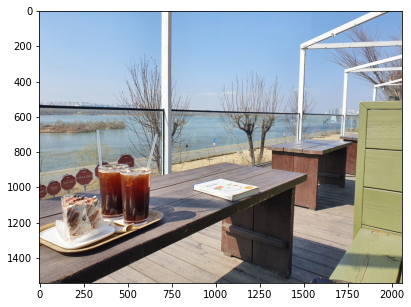

In [43]:
import os
import cv2
import matplotlib.pyplot as plt

cafe_image_path = os.getenv('HOME') +'/aiffel/EXPLORATION_project/ex16/images/cafe.jpg'
cafe_image = cv2.imread(cafe_image_path)
cafe_image = cv2.cvtColor(cafe_image, cv2.COLOR_BGR2RGB)

print(cafe_image.shape)

plt.figure(figsize=(10,5))
plt.imshow(cafe_image)

#### 2.불러온 이미지에 bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 1/4로 줄입니다. cv2.resize()를 사용해 봅시다.

(385, 514, 3)


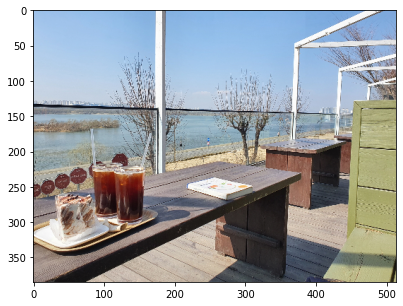

In [44]:
cubic_cafe_image = cv2.resize(sea_image, dsize=(sea_image.shape[1]//4, sea_image.shape[0]//4), interpolation=cv2.INTER_CUBIC)

print(cubic_cafe_image.shape)

plt.figure(figsize=(10,5))
plt.imshow(cubic_cafe_image)

#### 3.줄인 저해상도 이미지를 입력으로 SRGAN을 이용해 고해상도 이미지를 생성합니다. 이전에 사용한 apply_srgan 함수를 사용하면 쉽습니다.

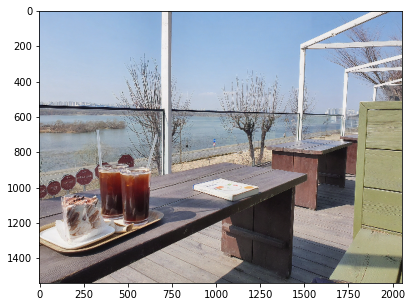

In [46]:
srgan_hr = apply_srgan(cubic_cafe_image)
plt.figure(figsize=(10,5))
plt.imshow(srgan_hr)

#### 4.2.의 이미지에 bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 다시 4배로 늘립니다. 마찬가지로 cv2.resize()를 사용해 봅시다.

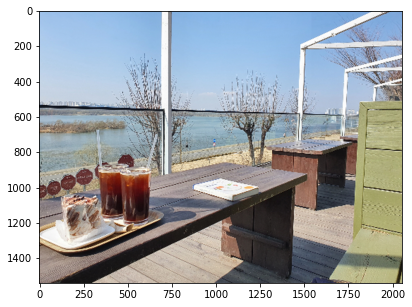

In [47]:
# bicubic interpolation으로 이미지 사이즈 키우기
bicubic_hr = cv2.resize(cubic_cafe_image, dsize=(cubic_cafe_image.shape[1]*4, cubic_cafe_image.shape[0]*4),interpolation=cv2.INTER_CUBIC)

plt.figure(figsize=(10,5))
plt.imshow(bicubic_hr)

#### 5.3개 이미지(4.의 Bicubic의 결과, 3.의 SRGAN의 결과, 1.의 원래 고해상도 이미지)를 나란히 시각화합니다. 각 이미지의 제목에 어떤 방법에 대한 결과인지 표시해 주세요. 이전 시각화에 사용했던 코드를 참고하면 어렵지 않습니다.

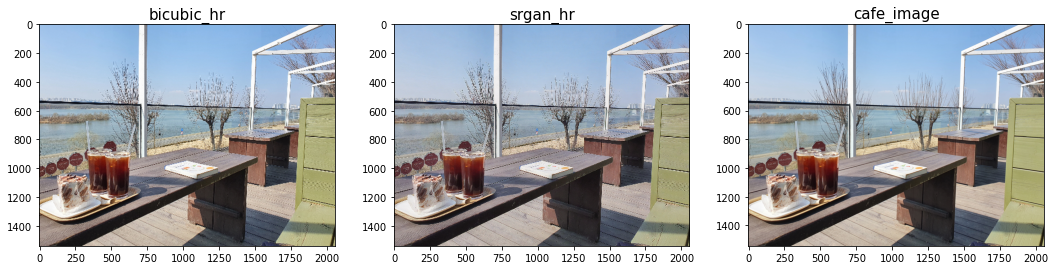

In [49]:
images = [bicubic_hr, srgan_hr, cafe_image]
titles = ["bicubic_hr", "srgan_hr", "cafe_image"]

plt.figure(figsize=(18,5))
for i, (image, title) in enumerate(zip(images, titles)):
    plt.subplot(1,3, i+1)
    plt.imshow(image)
    plt.title(title, fontsize=15)

Text(0.5, 1.0, 'cafe_image')

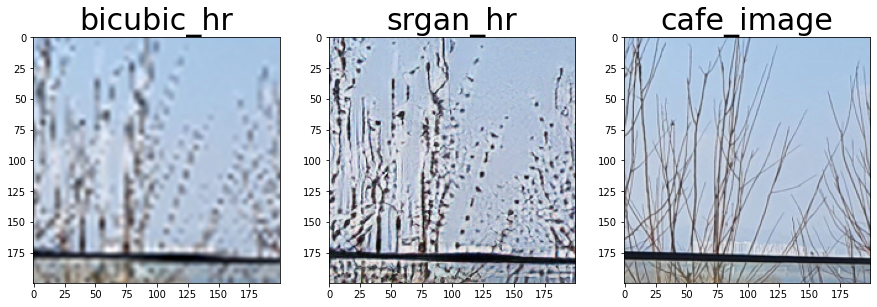

In [51]:
#이미지의 특정 부분을 잘라내는 함수정의
# top left에서 가로세로 150px 씩 잘라서 볼수있게
def crop(image, left_top, x=200, y=200):
    return image[left_top[0]:(left_top[0]+x), left_top[1]:(left_top[1]+y), :]

# 영역 잘라내어 보기
left_top = (400,1250)

img1 = crop(bicubic_hr, left_top)
img2 = crop(srgan_hr , left_top)
img3 = crop(cafe_image, left_top)

plt.figure(figsize=(15,25))
plt.subplot(1,3,1); plt.imshow(img1); plt.title("bicubic_hr", fontsize=30)
plt.subplot(1,3,2); plt.imshow(img2); plt.title("srgan_hr", fontsize=30)
plt.subplot(1,3,3); plt.imshow(img3); plt.title("cafe_image", fontsize=30)

#### 6.선택한 이미지를 DIV2K 데이터셋에서 학습된 모델로 Super Resolution했을 때 어떠한 결과가 나왔으며, 왜 이러한 결과가 출력되었는지 설명해 봅시다. (정답은 없습니다)

- 얇은 선 같은경우 끊어져서 보이게 되므로 srgan에서 예상하여 보여지는것이 선보다는 점이 진해지는것으로 보이게된다.